# Ejercicio con apuntes plataforma

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
pd.set_option('display.max_columns', None)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df.Outcome, test_size=0.2, random_state=42)

## Inicialización y entrenamiento del modelo

In [24]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Mostramos algunos de los árboles generados (100 por defecto)

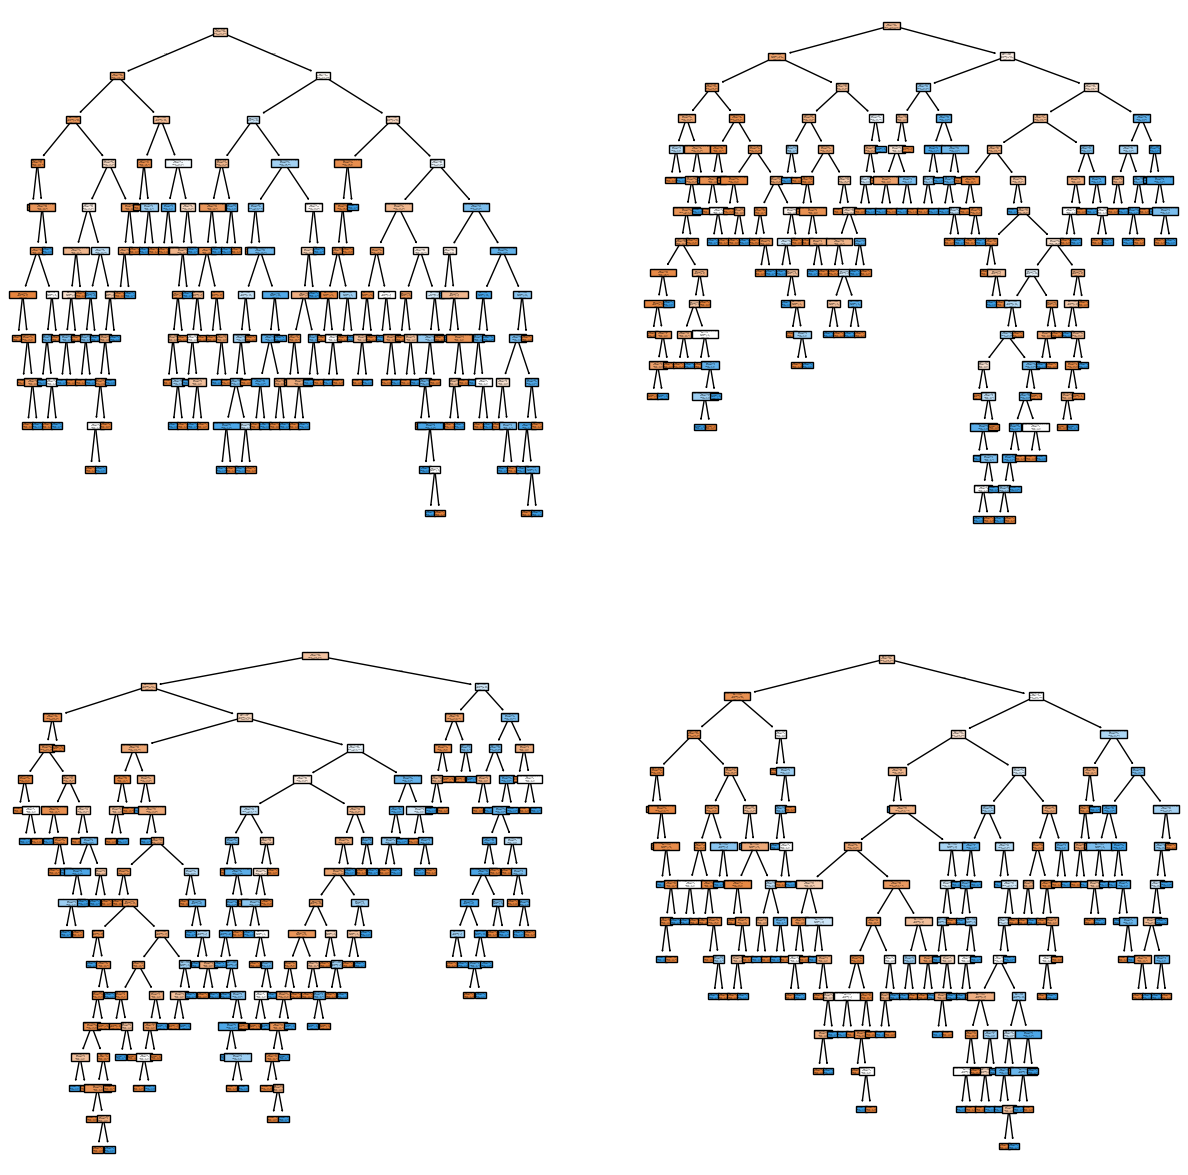

In [25]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["ND", "D"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["ND", "D"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["ND", "D"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["ND", "D"], filled = True)

plt.show()

SOn árboles muy grandes porque no tienen parámetros establecidos

## Predicción del modelo

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Precisión

In [27]:
accuracy_score(y_test, y_pred)

0.7207792207792207

Hemos obtenido más baja que con la optimización realizada en el ejercicio anterior.

## Exploración de resultados con cambio en los hiperparámetros


In [28]:
model_2 = RandomForestClassifier(random_state = 42, n_estimators = 60)
model_2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

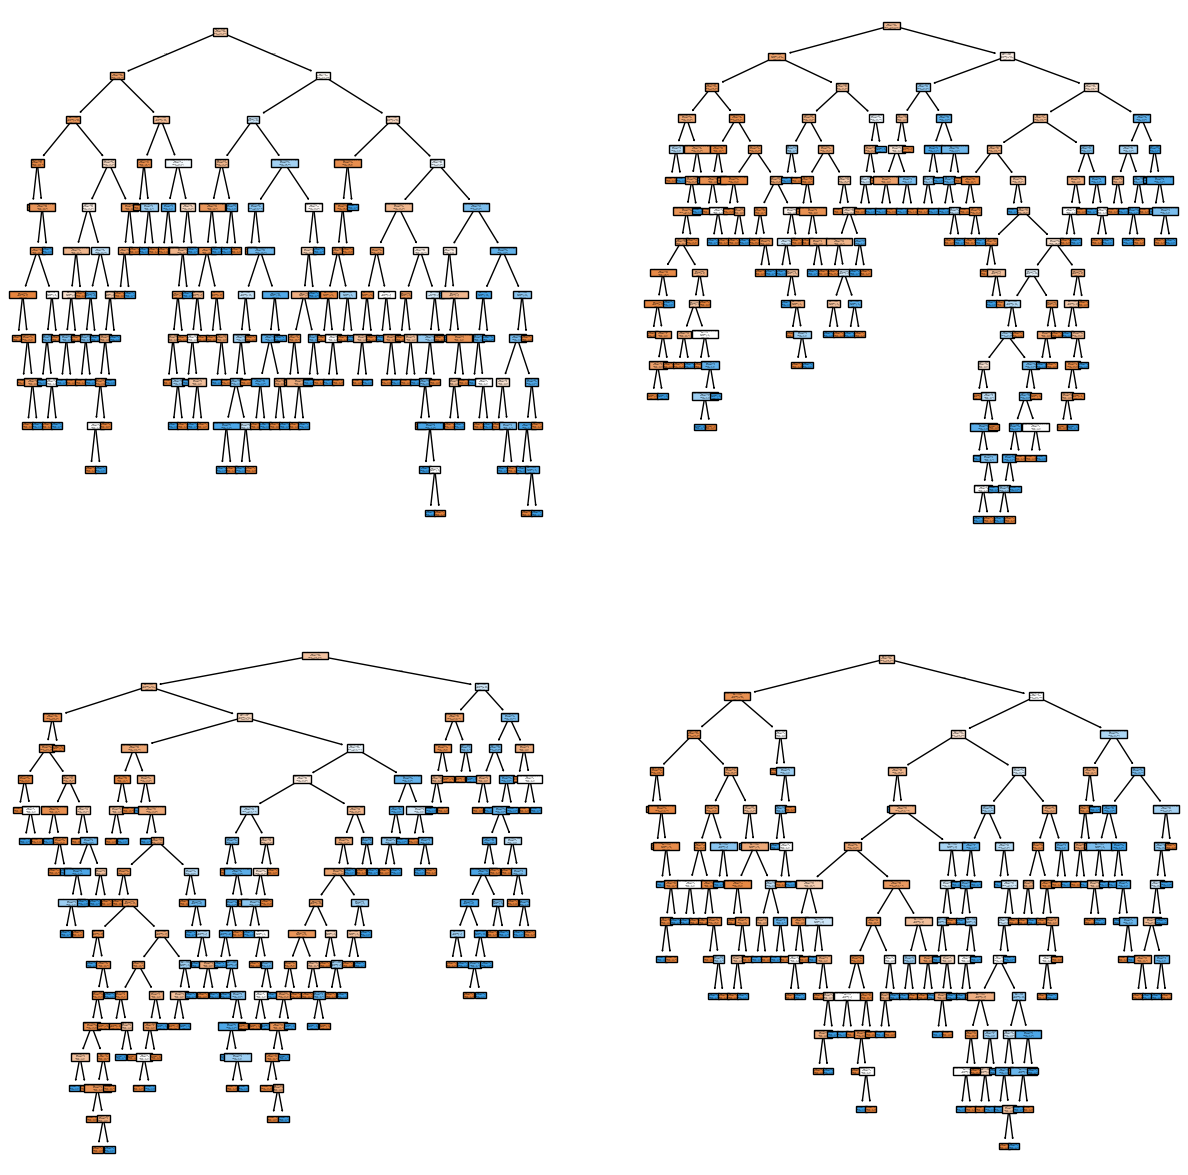

In [29]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model_2.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["ND", "D"], filled = True)
tree.plot_tree(model_2.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["ND", "D"], filled = True)
tree.plot_tree(model_2.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["ND", "D"], filled = True)
tree.plot_tree(model_2.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["ND", "D"], filled = True)

plt.show()

In [30]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [31]:
accuracy_score(y_test, y_pred_2)

0.7142857142857143

Obtengo peores resultados que en la solución. Lo único diferente es que carga los datos guardados del anterior ejercicio pero no afecta porque no hace ninguún tratamiento diferente.